## 1 show a graph

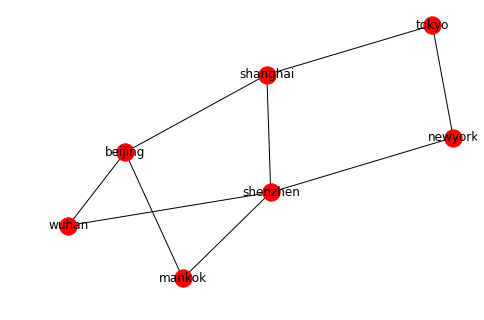

In [297]:
import networkx as nx

%matplotlib inline

BEIJING, SHANGHAI, WUHAN, SHENZHEN, MANKOK, TOKYO, NEWYORK = [
    "beijing", "shanghai", "wuhan", "shenzhen", "mankok", "tokyo", "newyork"
]

connect_node = {
    BEIJING:[SHANGHAI, WUHAN, MANKOK],
    SHANGHAI: [BEIJING, SHENZHEN, TOKYO],
    WUHAN: [BEIJING, SHENZHEN],
    SHENZHEN: [MANKOK, WUHAN, NEWYORK, SHANGHAI],
    MANKOK: [BEIJING, SHENZHEN],
    TOKYO: [SHANGHAI, NEWYORK],
    NEWYORK: [TOKYO, SHENZHEN],
}

graph = connect_node

g = nx.Graph(graph)
nx.draw(g, with_labels=True)



## 2 Navigation

### My code

In [158]:
def my_navigation(start, end, graph):
    paths = [[start], ]
    
    
    while (1) :
        node = paths.pop(0)
        path = node
        
        print("-------location %s" % node)
        
        next_nodes = graph[node[-1]]
        
        for s in next_nodes:
            print("looking for %s" % s)
            if s == end:
                path.append(s)
                return path     
            else:
                paths.append(path + [s])

In [170]:
my_navigation(BEIJING, TOKYO, connect_node)

[['beijing']]
-------location beijing
looking for shanghai
looking for wuhan
looking for mankok
[['beijing', 'shanghai'], ['beijing', 'wuhan'], ['beijing', 'mankok']]
-------location shanghai
looking for beijing
looking for shenzhen
looking for tokyo


['beijing', 'shanghai', 'tokyo']

## 3 the shortest nagivation

### my code

In [178]:
def my_navigation(start, end, graph):
    pathes = [[start], ]
    used_nodes = []
    
    # at first, I put `path = []` here, it is wrong, path should be refresh in every loop
    
    while (pathes) :
        print(pathes)
        path = pathes.pop()    # here should be pop(0), because sorted() had put smallest one in the head
        
        node = path[-1]
        print("-------location %s" % node)

        if node in used_nodes: continue
        
        next_nodes = graph[node]
        
        for s in next_nodes:
            print("looking for %s" % s)
            if s == end:
                path.append(s)
                return path     
            pathes.append(path + [s])
                
        pathes = sorted(pathes, key=len)
                
        used_nodes.append(node)

In [179]:
my_navigation(BEIJING, TOKYO, connect_node)

[['beijing']]
-------location beijing
looking for shanghai
looking for wuhan
looking for mankok
[['beijing', 'shanghai'], ['beijing', 'wuhan'], ['beijing', 'mankok']]
-------location mankok
looking for beijing
looking for shenzhen
[['beijing', 'shanghai'], ['beijing', 'wuhan'], ['beijing', 'mankok', 'beijing'], ['beijing', 'mankok', 'shenzhen']]
-------location shenzhen
looking for mankok
looking for wuhan
looking for newyork
looking for shanghai
[['beijing', 'shanghai'], ['beijing', 'wuhan'], ['beijing', 'mankok', 'beijing'], ['beijing', 'mankok', 'shenzhen', 'mankok'], ['beijing', 'mankok', 'shenzhen', 'wuhan'], ['beijing', 'mankok', 'shenzhen', 'newyork'], ['beijing', 'mankok', 'shenzhen', 'shanghai']]
-------location shanghai
looking for beijing
looking for shenzhen
looking for tokyo


['beijing', 'mankok', 'shenzhen', 'shanghai', 'tokyo']

**Python强调面向对象的运算，而不是面向过程的运算**

## 4 DFS

这里我写的dfs
它的本质是递归，因为是图，需要区分哪些点已经查询过了，所以需要额外多传一个参数

In [288]:
def my_navigation_dfs(start, end, graph, used=None):
    pathes = [[start], ]
    if used == None:
        used_nodes = []
    else:
        used_nodes = used
    
    while (pathes) :
        print(pathes)
        path = pathes.pop(0)
        
        node = path[-1]
        print("-------location %s" % node)
    
        used_nodes.append(node)
        next_nodes = graph[node]
        print("------next node %s" % next_nodes)
        for s in next_nodes:
            print("looking for %s" % s)
            if s in used_nodes: continue
            if s == end: return [s]
            target = my_navigation_dfs(s, end, graph, used_nodes)
            if target:
                return [s] + target
           
        return None
        #pathes = sorted(pathes, key=len)
                
        

In [298]:
my_navigation_dfs(BEIJING, TOKYO, connect_node)

[['beijing']]
-------location beijing
------next node ['shanghai', 'wuhan', 'mankok']
looking for shanghai
[['shanghai']]
-------location shanghai
------next node ['beijing', 'shenzhen', 'tokyo']
looking for beijing
looking for shenzhen
[['shenzhen']]
-------location shenzhen
------next node ['mankok', 'wuhan', 'newyork', 'shanghai']
looking for mankok
[['mankok']]
-------location mankok
------next node ['beijing', 'shenzhen']
looking for beijing
looking for shenzhen
looking for wuhan
[['wuhan']]
-------location wuhan
------next node ['beijing', 'shenzhen']
looking for beijing
looking for shenzhen
looking for newyork
[['newyork']]
-------location newyork
------next node ['tokyo', 'shenzhen']
looking for tokyo


['shanghai', 'shenzhen', 'newyork', 'tokyo']